# Assignment 1 (FIT1043)

# Introduction

This assignment is carried out to investigate and visualise the two data sets provided using **Python** in **Jupyter Notebook** environment. Aside from the provided data sets, 4 questions are introduced to narrow down the scope of investigation and analysis of the data. 

To conduct a systemic analysis, the assignment is broken down into multiple sections, each separated by a grey line:
- Introduction
- Exploring the data at first glance
- Question 1
- Question 2
- Question 3
- Question 4
- Conclusion

In the second section, a general understanding of the data is obtained through some basic data auditing such as observing the size of data and analysing the five number summary. Unusual data that requires further inspection are investigated following the basic data auditing. After familiarising with the data sets and having an idea of its meaning, the two data sets are merged before proceeding to answering the 4 questions.

In the sections for the questions, there will be a short summary on the approach before the coding section, then ended with an analysis. Aside from question 1, the remaining 3 questions have an extra sub-section of visualisation for readers to easily see the results.

The final section is an overall business insight after conducting the total investigation.

<hr style="border-color:grey;">

## Exploring the data at first glance 
- The first 5 rows of each files are returned to get an idea of what kind of data we are dealing with.

### Importing the necessary libraries and csv files

In [39]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import datetime
%matplotlib inline

ticket_seating = pd.read_csv('fit1043-ticket-seating.csv')
ticket_trx = pd.read_csv('fit1043-ticket-trx.csv')

In [40]:
ticket_seating.head()

,Transaction.Number,Transaction.Sequence.Number,Cinema,Session.Id,Session.Screening.Time,Session.Type,Public.Screening,Seat.Allocation,Session.Status,Screen.Name,Film,Seat.Number,Screen.Row.ID,Grid.Col.Id,Grid.Row.Id,Layout
0,689235,5,Timbuktoo,11193,1/4/2017 19:30,Normal Session,Yes,Manual,Open,H9,Film 13,7.0,C,5,3,Originalv2
1,689235,6,Timbuktoo,11193,1/4/2017 19:30,Normal Session,Yes,Manual,Open,H9,Film 13,6.0,C,6,3,Originalv2
2,691991,5,Timbuktoo,10971,1/4/2017 13:00,Normal Session,Yes,Manual,Open,H3,Film 6,11.0,C,15,3,Originalv3
3,691991,6,Timbuktoo,10971,1/4/2017 13:00,Normal Session,Yes,Manual,Open,H3,Film 6,10.0,C,16,3,Originalv3
4,692271,1,Timbuktoo,11004,1/4/2017 11:00,Normal Session,Yes,Manual,Open,H4,Film 6,20.0,A,10,1,Originalv2


In [41]:
ticket_trx.head()

,Transaction.Number,Transaction.Sequence.Number,Transaction.Date.Time,Type.Of.Transaction,Film.Code,Film.HO.Code,Ticket.Type,Ticket.Type.Code,Ticket.Type.HO.Code,Ticket.Class,...,Workstation.Desc,Workgroup.Desc,Report.Code,Ticket.Num..numeric.,Ticket.Num..alpha.,POS.Session.ID,Order.Time..Secs.,Sequence.Refunded,Ticket.Numbering.Style,Full.Price
0,689235,5,2/4/2017 0:34,Refund Portion,Code 28,HOC 29,Web $9.00,37,HOC 29,General,...,POS19,Box Office,REFUND,32,0.0,1667,0,1,0.0,9.0
1,689235,6,2/4/2017 0:34,Refund Portion,Code 28,HOC 29,Web $9.00,37,HOC 29,General,...,POS19,Box Office,REFUND,33,0.0,1667,0,2,0.0,9.0
2,691991,5,2/4/2017 0:33,Refund Portion,Code 22,HOC 33,Web $9.00,37,HOC 33,General,...,POS19,Box Office,REFUND,29,0.0,1667,0,1,0.0,9.0
3,691991,6,2/4/2017 0:33,Refund Portion,Code 22,HOC 33,Web $9.00,37,HOC 33,General,...,POS19,Box Office,REFUND,30,0.0,1667,0,2,0.0,9.0
4,692271,1,1/4/2017 6:01,Ticket Refunded,Code 22,HOC 33,Web $9.00,37,HOC 33,General,...,WEB,Back Office,0,2,NaN,1649,0,0,NaN,9.0


- Based on the rows returned from each file, it can be seen that ``ticket_seating`` contains information regarding seats location and screening time; whereas ``ticket_trx`` keeps track of the sales administration.
- The first two columns of both files ( ``Transaction.Number`` and ``Transaction.Sequence.Number``) indicate that they are related, this means that the two files can be **merged** into one DataFrame using the two columns as a unique identifier. To avoid confusion, this will be done after an individual basic data auditing of both files for a cleaner analysis.

### Basic data auditing
- observe the size of data.
- Return the **five number summary** of data to analyse the numerical data.

In [42]:
print("The rows and columns for ticket_seating: " + str(ticket_seating.shape))
ticket_seating.describe()

The rows and columns for ticket_seating: (88477, 16)


,Transaction.Number,Transaction.Sequence.Number,Session.Id,Seat.Number,Grid.Col.Id,Grid.Row.Id
count,88477.000000,88477.000000,88477.000000,88327.000000,88477.000000,88477.000000
mean,726713.927156,5.204211,12278.738395,10.706262,11.684619,4.512110
std,20475.126596,23.963779,797.306817,5.921585,6.218160,2.491775
min,689235.000000,1.000000,10893.000000,1.000000,0.000000,0.000000
25%,708132.000000,1.000000,11646.000000,6.000000,7.000000,3.000000
50%,726091.000000,2.000000,12193.000000,10.000000,11.000000,4.000000
75%,744559.000000,2.000000,12797.000000,15.000000,15.000000,6.000000
max,761953.000000,392.000000,13879.000000,28.000000,30.000000,15.000000


In [43]:
print("The rows and columns for ticket_trx: " + str(ticket_trx.shape))
ticket_trx.describe()

The rows and columns for ticket_trx: (88477, 35)


,Transaction.Number,Transaction.Sequence.Number,Ticket.Type.Code,Admits,Gross.Box.Office,Net.BoxOffice,Sales.Tax.1,Sales.Tax.2,Gross.Box.Office.Each,Sales.Tax.1.Each,...,Gross.Each..excl..Redemp.,Sales.Tax.1..excl..Redemp.,Sales.Tax.2..excl..Redemp.,Ticket.Num..numeric.,Ticket.Num..alpha.,POS.Session.ID,Order.Time..Secs.,Sequence.Refunded,Ticket.Numbering.Style,Full.Price
count,88477.000000,88477.000000,88477.000000,88477.000000,88477.000000,88477.000000,88477.000000,88477.000000,88477.000000,88477.000000,...,88477.000000,88477.000000,88477.000000,88477.000000,515.0,88477.000000,88477.000000,88477.000000,515.0,88477.000000
mean,726713.927156,5.204211,31.250246,0.988359,8.484312,6.476065,1.621155,0.387092,8.582880,1.639989,...,8.582880,1.639989,0.391587,387.769759,0.0,1894.235621,54.096500,0.012433,0.0,8.582880
std,20475.126596,23.963779,9.905059,0.152143,1.807816,1.379903,0.345691,0.082237,1.259326,0.241001,...,1.259326,0.241001,0.057122,746.427252,0.0,142.562445,48.042458,0.199527,0.0,1.259326
min,689235.000000,1.000000,1.000000,-1.000000,-10.000000,-7.630000,-1.910000,-0.460000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.0,1649.000000,0.000000,0.000000,0.0,0.000000
25%,708132.000000,1.000000,36.000000,1.000000,9.000000,6.870000,1.720000,0.410000,9.000000,1.720000,...,9.000000,1.720000,0.410000,115.000000,0.0,1776.000000,29.000000,0.000000,0.0,9.000000
50%,726091.000000,2.000000,36.000000,1.000000,9.000000,6.870000,1.720000,0.410000,9.000000,1.720000,...,9.000000,1.720000,0.410000,263.000000,0.0,1882.000000,47.000000,0.000000,0.0,9.000000
75%,744559.000000,2.000000,36.000000,1.000000,9.000000,6.870000,1.720000,0.410000,9.000000,1.720000,...,9.000000,1.720000,0.410000,476.000000,0.0,2014.000000,71.000000,0.000000,0.0,9.000000
max,761953.000000,392.000000,47.000000,1.000000,10.000000,7.630000,1.910000,0.460000,10.000000,1.910000,...,10.000000,1.910000,0.460000,8564.000000,0.0,2145.000000,1246.000000,10.000000,0.0,10.000000


### Five-number summary
#### At first glance
- Both files have 88477 rows of record. ``ticket_trx`` has 35 columns, which is approximately double the columns of ``ticket_seating`` (16 columns). This means we are likely to be able to extract more information and insights from ticket sales.
- Looking at the five-number summary of the first two columns from the two data sets (previously established as the unique identifier), the results are identical. From this, it can be logically assumed that each record in ``ticket_seating`` has a corresponding record in ``ticket_trx``. This allows the data sets to be merged into one DataFrame without worrying about missing rows.
- ``ticket_seating`` mainly consists of categorical data; whereas ``ticket_trx`` contains numerical data that can be analysed and interpreted for business insight.
- Hence, The five-number summary of ``ticket_trx`` proves to be much more meaningful and valuable than that of ``ticket_seating``. 

#### Analysing ``ticket_trx``
- The *minimum value* of certain columns are negative, assumed to be associated with refunds. For example, ``Admits`` has **-1** as its *minimum value*, this is likely due to a refund or a cancellation. To make sure that ticket sales are rightfully analysed, this will be confirmed in the next sub-section.
- There are three exactly identical columns, which are ``Gross.Box.Office.Each``,``Gross.Each..excl..Redemp.`` and ``Full.Price``. Because the two columns indicating revenue are exactly the same as the full price sold, it proves that the columns indicate the **gross revenue** and not net profit. These columns can be analysed alongside ``Gross.Box.Office``, as they all share similar data.
- The difference is that the *minimum value* of ``Gross.Box.Office`` is **-10**; whereas for the three identical columns, the *minimum value* is **0**. From this, it can be assumed ``Gross.Box.Office`` takes refunds into account, whereas the two identical columns do not.


- Because the *mean* of ``Gross.Box.Office`` approximately equals to the *sum of means* of ``Net.BoxOffice``,``Sales.Tax.1`` and ``Sales.Tax.2``, we can safely assume ``Net.BoxOffice`` contains **net profit** of sales after deducting tax.
- Based on the five-number summary, we know that the average revenue per sales is roughly <span>&#36;</span>8.48, while the net profit would be <span>&#36;</span>6.48.

### Investigating the negative values

In [44]:
temp_ticket_trx = ticket_trx[['Transaction.Number', 
                              'Transaction.Sequence.Number', 
                              'Transaction.Date.Time',
                              'Type.Of.Transaction',
                              'Admits',
                              'Gross.Box.Office',
                              'Gross.Each..excl..Redemp.',
                              'Full.Price']].copy()
filt = (temp_ticket_trx.Admits < 0) #admits = negative
temp_ticket_trx[filt].shape

(515, 8)

In [45]:
#admits = negative AND type of transaction = refund portion
filt2 = ((temp_ticket_trx['Type.Of.Transaction'] == 'Refund Portion') & (temp_ticket_trx.Admits < 0) ) 
temp_ticket_trx[filt2].shape

(515, 8)

- Because both filters return the same number of rows, we can safely assume all negative values in the data set are related to refunds and labelled as **Refund Portion** in ``Type.Of.Transaction``
- Now, let's take a look at 3 randomly selected transaction numbers for further investigations on the type of transaction.

In [46]:
temp_ticket_trx.loc[(temp_ticket_trx['Transaction.Number'] == 689235)|
                   (temp_ticket_trx['Transaction.Number'] == 694740)|
                   (temp_ticket_trx['Transaction.Number'] == 754839)]

,Transaction.Number,Transaction.Sequence.Number,Transaction.Date.Time,Type.Of.Transaction,Admits,Gross.Box.Office,Gross.Each..excl..Redemp.,Full.Price
0,689235,5,2/4/2017 0:34,Refund Portion,-1,-9.0,9.0,9.0
1,689235,6,2/4/2017 0:34,Refund Portion,-1,-9.0,9.0,9.0
3598,694740,1,1/4/2017 19:30,Ticket Refunded,1,9.0,9.0,9.0
3599,694740,2,1/4/2017 19:30,Ticket Refunded,1,9.0,9.0,9.0
3600,694740,5,2/4/2017 0:35,Refund Portion,-1,-9.0,9.0,9.0
3601,694740,6,2/4/2017 0:35,Refund Portion,-1,-9.0,9.0,9.0
78708,754839,1,28/4/2017 21:09,Ticket Refunded,1,9.0,9.0,9.0
78709,754839,2,28/4/2017 21:09,Ticket Refunded,1,9.0,9.0,9.0
78710,754839,3,28/4/2017 21:09,Ticket Refunded,1,9.0,9.0,9.0
78711,754839,6,30/4/2017 15:06,Refund Portion,-1,-9.0,9.0,9.0


- For the first transaction, we notice that there is no positive values in ``Admits``, this may be related to missing rows that might be from a previous month's data. We assume this because the first transaction sequence number is missing.
- For the latter transactions, it can be seen that values for the type ``Ticket Refunded`` are positive, and they are offset by rows with ``Refund Portion`` with correspoinding negative values, resulting in net value of 0. Therefore, we can assume that ``Gross.Box.Office`` do not consider taxes, but **do** consider refunds. If we were to sum the values of each row, we would get the results of only successfull tickets purchased without refunds.

### Investigating the missing values

In [47]:
#Transaction sequence number: 1 ; Admits : -1
filt3 = ((temp_ticket_trx['Transaction.Sequence.Number'] == 1) & (temp_ticket_trx.Admits < 0) )
print(temp_ticket_trx[filt3].shape)

(0, 8)


In [48]:
filt4 = ticket_trx['Transaction.Sequence.Number'] == 1
print('(row,column) for Transaction.Sequence.Number == 1 is ' + str(temp_ticket_trx[filt4].shape))
print(ticket_trx['Transaction.Number'].value_counts())

(row,column) for Transaction.Sequence.Number == 1 is (36402, 8)
704807    392
704804    330
704806    264
704800    263
704829    188
         ... 
698087      1
696032      1
708371      1
717048      1
695563      1
Name: Transaction.Number, Length: 36591, dtype: int64


In [49]:
ticket_trx['Type.Of.Transaction'].value_counts() #compare ticket refunded and refund portion counts

Ticket Sold        87442
Ticket Refunded      520
Refund Portion       515
Name: Type.Of.Transaction, dtype: int64

- According to the investigation above, there are 36591 transactions in total, and among them, 36402 have transaction sequence number 1. This means that there are potentially 189 records that are incomplete, suspectedly due to undocumented records from past month. 
- Additionally, the count of ``Ticket Refunded`` and ``Refund Portion`` are not equal, this may be due to discounts or missing data from the data sets given. 
- Because this takes up less than 0.3% of the total records, we will neglect this error as it will not have an impact that will affect our investigation. However, it is still worth to keep in mind.

### Merging the two files
- Based on previous analysis, merging is completed by using the first two columns as the unique identifier.
- The resulting DataFrame will have the same amount of rows as in ``ticket_seating`` and ``ticket_trx``; whereas the columns of both data sets are combined, resulting in 49 columns.


In [50]:
df = pd.merge(ticket_seating, ticket_trx, on=['Transaction.Number','Transaction.Sequence.Number'])
print(df.shape)
df.head()

(88477, 49)


,Transaction.Number,Transaction.Sequence.Number,Cinema,Session.Id,Session.Screening.Time,Session.Type,Public.Screening,Seat.Allocation,Session.Status,Screen.Name,...,Workstation.Desc,Workgroup.Desc,Report.Code,Ticket.Num..numeric.,Ticket.Num..alpha.,POS.Session.ID,Order.Time..Secs.,Sequence.Refunded,Ticket.Numbering.Style,Full.Price
0,689235,5,Timbuktoo,11193,1/4/2017 19:30,Normal Session,Yes,Manual,Open,H9,...,POS19,Box Office,REFUND,32,0.0,1667,0,1,0.0,9.0
1,689235,6,Timbuktoo,11193,1/4/2017 19:30,Normal Session,Yes,Manual,Open,H9,...,POS19,Box Office,REFUND,33,0.0,1667,0,2,0.0,9.0
2,691991,5,Timbuktoo,10971,1/4/2017 13:00,Normal Session,Yes,Manual,Open,H3,...,POS19,Box Office,REFUND,29,0.0,1667,0,1,0.0,9.0
3,691991,6,Timbuktoo,10971,1/4/2017 13:00,Normal Session,Yes,Manual,Open,H3,...,POS19,Box Office,REFUND,30,0.0,1667,0,2,0.0,9.0
4,692271,1,Timbuktoo,11004,1/4/2017 11:00,Normal Session,Yes,Manual,Open,H4,...,WEB,Back Office,0,2,NaN,1649,0,0,NaN,9.0


In [51]:
print(pd.DataFrame(df.columns)) #check columns

                              0
0            Transaction.Number
1   Transaction.Sequence.Number
2                        Cinema
3                    Session.Id
4        Session.Screening.Time
5                  Session.Type
6              Public.Screening
7               Seat.Allocation
8                Session.Status
9                   Screen.Name
10                         Film
11                  Seat.Number
12                Screen.Row.ID
13                  Grid.Col.Id
14                  Grid.Row.Id
15                       Layout
16        Transaction.Date.Time
17          Type.Of.Transaction
18                    Film.Code
19                 Film.HO.Code
20                  Ticket.Type
21             Ticket.Type.Code
22          Ticket.Type.HO.Code
23                 Ticket.Class
24                   Price.Card
25                    Sales.Tax
26                       Admits
27             Gross.Box.Office
28                Net.BoxOffice
29                  Sales.Tax.1
30      

---
## Question 1
Which movie generated the **highest revenue** in the dataset? 


### Approach
- We need columns as movie identifier, then find columns that give us the revenue value to be grouped and compared using ``aggregate``.
- To avoid wrong assumptions, we will take all relevant columns, then decide on which to use and interpret.
- Since the question did not specify gross revenue or net revenue, all possiblities will be considered.

In [52]:
gross_sales = {
    'Gross.Box.Office':'sum', #consider refund; do not consider tax
    'Gross.Each..excl..Redemp.':'sum', #do not consider both refund and tax
    'Net.BoxOffice':'sum' #consider both refund and tax
}

#all 3 film identifiers are used and compared
groupbyMovie = df.groupby(['Film','Film.Code','Film.HO.Code']).agg(gross_sales)
groupbyMovie.sort_values('Gross.Each..excl..Redemp.', ascending=False) 

,,,Gross.Box.Office,Gross.Each..excl..Redemp.,Net.BoxOffice
Film,Film.Code,Film.HO.Code,,,
Film 5,Code 27,HOC 23,321248.5,324590.5,245221.510
Film 6,Code 22,HOC 33,68564.0,68899.0,52337.310
Film 25,Code 11,HOC 20,58725.0,59121.0,44824.105
Film 3,Code 35,HOC 1,48343.0,48535.0,36901.875
Film 31,Code 4,HOC 19,37826.0,40550.0,28871.405
Film 37,Code 23,HOC 15,35775.5,36435.5,27296.710
Film 10,Code 24,HOC 38,31590.0,31830.0,24112.635
Film 4,Code 33,HOC 5,28629.5,28755.5,21852.800
Film 35,Code 26,HOC 34,18225.0,18225.0,13911.750


### Analysis 
- Since the DataFrame returned do not contain any multi-index columns, we can safely assume that either movie identifier can be used, as they all point the to same movie.
- **Film 5 (Code 7, HOC 27)** has the highest gross revenue : <span>&#36;</span> 324590.50. (not taking refunds or taxes into account)
- Additionally, even when refunds and taxes are taken into consideration, Film 5 still has the highest net revenue by a big margin compared to the rest. 

---


## Question 2
Which day (as in Monday, Tuesday, etc and not date) is the **least popular day** to watch a movie?
 

### Approach
- First we will have to decide on a column that has the appropriate information of the popular days. ``Transaction.Date.Time`` is avoided becuase it may not necessarily be the same as the day of screening, hence using this would not accurately reflect the least popular day. Therefore, we will use ``Session.Screening.Time``.
- The date from ``Session.Screening.Time`` is extracted into a new data frame, then converted into days of week. 
- Before counting the days, the dataframe is filtered so that refund records are not included.
- Then, ``aggregation`` is used to count the amount of times each day appears in the data set, finally visualise the results with a bar chart.

In [53]:
print(df['Session.Screening.Time'].dtypes) #confirm data type of date

object


In [54]:
#change to datetime format
q2 = pd.DataFrame(df[['Transaction.Number','Type.Of.Transaction']])
q2['Date'] = pd.to_datetime(df['Session.Screening.Time'], dayfirst=True) #use appropriate date format to avoid month/day error

#check 
print(q2.Date.dtypes)
q2

datetime64[ns]


,Transaction.Number,Type.Of.Transaction,Date
0,689235,Refund Portion,2017-04-01 19:30:00
1,689235,Refund Portion,2017-04-01 19:30:00
2,691991,Refund Portion,2017-04-01 13:00:00
3,691991,Refund Portion,2017-04-01 13:00:00
4,692271,Ticket Refunded,2017-04-01 11:00:00
...,...,...,...
88472,761950,Ticket Sold,2017-05-01 00:05:00
88473,761953,Ticket Sold,2017-05-01 00:15:00
88474,761953,Ticket Sold,2017-05-01 00:15:00
88475,761953,Ticket Sold,2017-05-01 00:15:00


In [55]:
#Add day of the week
q2['Day'] = q2['Date'].dt.dayofweek
q2.head()

,Transaction.Number,Type.Of.Transaction,Date,Day
0,689235,Refund Portion,2017-04-01 19:30:00,5
1,689235,Refund Portion,2017-04-01 19:30:00,5
2,691991,Refund Portion,2017-04-01 13:00:00,5
3,691991,Refund Portion,2017-04-01 13:00:00,5
4,692271,Ticket Refunded,2017-04-01 11:00:00,5


In [56]:
#filter out refunded tickets, only look at ticket sold
filt5 = q2['Type.Of.Transaction'] == 'Ticket Sold'
q2 = q2[filt5]
q2

,Transaction.Number,Type.Of.Transaction,Date,Day
8,692272,Ticket Sold,2017-04-02 19:30:00,6
9,692272,Ticket Sold,2017-04-02 19:30:00,6
10,692274,Ticket Sold,2017-04-01 17:30:00,5
11,692274,Ticket Sold,2017-04-01 17:30:00,5
12,692276,Ticket Sold,2017-04-01 13:00:00,5
...,...,...,...,...
88472,761950,Ticket Sold,2017-05-01 00:05:00,0
88473,761953,Ticket Sold,2017-05-01 00:15:00,0
88474,761953,Ticket Sold,2017-05-01 00:15:00,0
88475,761953,Ticket Sold,2017-05-01 00:15:00,0


In [57]:
#count day
groupbyDay = q2.groupby('Day').agg({'Day' : 'count'}).rename(columns={
    'Day':'Count'
})
groupbyDay = groupbyDay.reset_index()
groupbyDay

,Day,Count
0,0,8403
1,1,5739
2,2,7389
3,3,9052
4,4,15236
5,5,22762
6,6,18861


### Visualisation
- To clearly see the popularity between different days, we will use a **bar chart** to show the lowest bar which indicates the least popular day.

Text(0.5, 1.0, 'Tickets sold per day of the week')

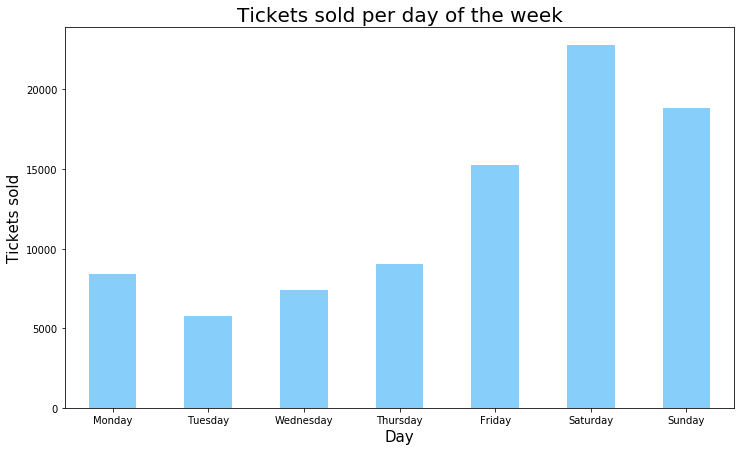

In [58]:
#Display as Bar Chart

barchart = groupbyDay.Count.plot.bar(figsize=(12,7),align='center',color='lightskyblue')

#use values of column 'Day' as the x-axis labels
barchart.set_xticklabels(groupbyDay['Day'],rotation=360)

#set x-axis label
labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.xlabel('Day', fontsize = '15')
barchart.set_xticklabels(labels)

#set y-axis label
plt.ylabel('Tickets sold',fontsize = '15')

#set chart title
plt.title('Tickets sold per day of the week',fontsize = '20')

### Analysis
- The lower bar in the chart is Tuesday. Since Tuesday sold the least tickets, we can conclude **Tuesday** is the least popular day to watch a movie.

---

## Question 3
What is the **most popular time of the day** for movie goers?  Think from the intended audience perspective (the cinema management).

### Approach
- First, we decide on a reasonable time interval.
- We do not mathematically divide the 24 hours equally as this would not result in a logical timeframe for interpretation.
    - Midnight : 0000 - 0500
    - Morning: 0500 - 1200
    - Early Afternoon : 1200 - 1500
    - Late Afternoon: 1500 - 1700
    - Evening : 1700 - 1900
    - Night : 1900 - 2400
- Based on the filtered dataframe obtained form question 2, the time is split from the date into a separate column for convenience.
- Each time is labelled accordingly based on the time interval decided earlier.
- The number of times the time interval occurs is counted and made into a new DataFrame to easily plot a pie chart.

In [59]:
#extract the time only from date
q3 = pd.DataFrame(q2['Date'])
q3['Time'] = pd.to_datetime(q3['Date']).dt.time
q3['Date'] = pd.to_datetime(q3['Date']).dt.date

#count Time
groupbyTime1 = q3.groupby('Time').agg({'Time':'count'}).rename(columns={'Time':'Count'})
groupbyTime1 = groupbyTime1.reset_index()
groupbyTime1

,Time,Count
0,00:05:00,197
1,00:15:00,287
2,00:30:00,31
3,00:45:00,81
4,11:00:00,1905
...,...,...
91,23:30:00,1269
92,23:40:00,7
93,23:45:00,891
94,23:50:00,55


In [60]:
#time must be converted from object to datetime format for manipulation
groupbyTime1.Time = pd.to_datetime(groupbyTime1.Time, format='%H:%M:%S')

#create new column to label the times
temp = groupbyTime1.assign(time_intervals = pd.cut(groupbyTime1.Time.dt.hour,
                                           [-1,4,11,14,16,18,23],
                                          labels=['Midnight','Morning','Early Afternoon','Late Afternoon','Evening','Night']))
groupbyTime1['Time Interval'] = temp['time_intervals']

In [61]:
#group by time interval
groupbyTimeInterval = pd.DataFrame(groupbyTime1.groupby('Time Interval')['Count'].sum())
groupbyTimeInterval

,Count
Time Interval,
Midnight,596
Morning,5242
Early Afternoon,17572
Late Afternoon,17543
Evening,14283
Night,32206


### Visualisation
- A **pie chart** is used to visualise the results easily.
- The pie chart is set to display each sectors in a clockwise manner from **Morning** to **Midnight** to easily follow the time intervals.
- The starting angle is set to -267 to let the pie chart start from **Morning** at the top.

Text(0.5, 1.0, 'Number of Tickets Sold per Time Interval')

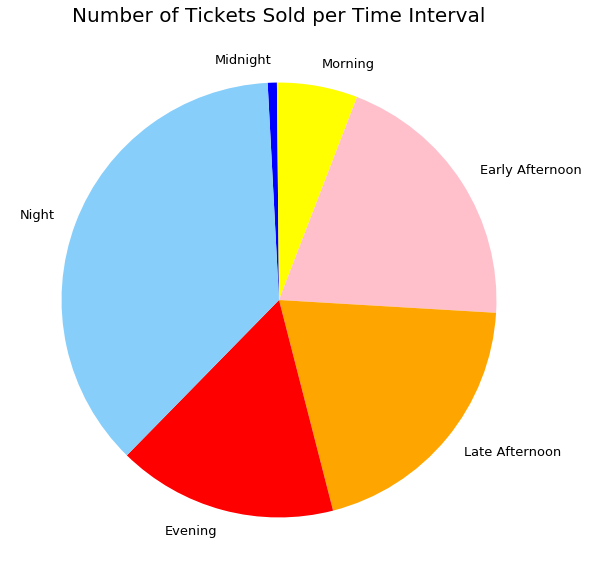

In [62]:
#plot pie chart
groupbyTimeInterval.plot.pie(y = 'Count',
                             figsize = (10,10),
                             legend=None, 
                             fontsize = '13',
                             colors = ['blue','yellow','pink','orange','red','lightskyblue'],
                             counterclock=False, #morning to midnight
                             startangle=-267) #start from morning

#hide y-axis
plt.ylabel('')

#set chart title
plt.title('Number of Tickets Sold per Time Interval', fontsize = '20')

In [63]:
groupbyTimeInterval[groupbyTimeInterval.index == 'Night']

,Count
Time Interval,
Night,32206


In [64]:
print('Night ticket sales percentage : ' + str(round(32206/87442*100,2)) + '%')

Night ticket sales percentage : 36.83%


### Analysis
- The most popular time of the day for movie goers is **Night** as it takes up the largest sector of the pie chart. From the dataframe and calculation, 32206 of the ticket sales are bought during **Night** time, which is 36.83% of the total sales. Therefore, **Night** time can be considered a significant preference for movie goers compared to the rest of time intervals.

---


## Question 4
Using the column ``Order.Time..Secs`` , determine (other than WEB user) which user has the **best averaged order time** (turnaround). This is basically how fast (efficient) the user is. 
 

### Approach
- Check the values of ``User`` and ``Order.Time..Secs.`` first to get an idea of how many users we will be looking into and the range of the order times.
- The WEB users are filtered out before using ``aggregation`` and finding out the mean order time for each user.
- A scatter plot is used to visualise the averaged order time.

In [65]:
print(df['User'].value_counts())
print(df['Order.Time..Secs.'].value_counts())

User_09        14241
 WEB           12075
User_08         5564
User_03         5552
User_18         4834
User_04         4660
User_02         4632
User_12         4568
User_14         4475
User_07         3797
User_20         2610
Mgr_02          2593
User_11         2181
User_10         2113
User_19         2079
Mgr_01          2042
User_23         2025
User_16         1443
User_21         1211
Mgr_03          1106
User_01         1104
User_05          752
User_06          714
Mgr_04           673
User_22          367
User_17          343
Mgr_05           237
NoShow           181
Mgr_06           167
User_13          109
User_15           29
Name: User, dtype: int64
0       12523
39       1789
55       1421
49       1315
42       1299
        ...  
715         1
303         1
305         1
1220        1
1120        1
Name: Order.Time..Secs., Length: 332, dtype: int64


- There are 12075 WEB users, these will be filtered out of the new data frame created.
- There are 12523 order times that are 0 seconds. This amount exceeds the number of WEB users, which means that there are other records that should not be taken into consideration when we calculate the average. This will be investigated and determined before proceeding.

In [66]:
q4 = df[[
    'Transaction.Number',
    'Type.Of.Transaction',
    'User',
    'Order.Time..Secs.']].copy()
q4

,Transaction.Number,Type.Of.Transaction,User,Order.Time..Secs.
0,689235,Refund Portion,NoShow,0
1,689235,Refund Portion,NoShow,0
2,691991,Refund Portion,NoShow,0
3,691991,Refund Portion,NoShow,0
4,692271,Ticket Refunded,WEB,0
...,...,...,...,...
88472,761950,Ticket Sold,User_18,73
88473,761953,Ticket Sold,User_18,44
88474,761953,Ticket Sold,User_18,44
88475,761953,Ticket Sold,User_18,44


In [67]:
print(q4[(q4['Order.Time..Secs.'] == 0) & (q4['User'].str.contains('WEB'))].shape) #confirm all WEB users have 0 second
q4[(q4['Order.Time..Secs.'] == 0) & ~(q4['User'].str.contains('WEB'))] #0 second but NOT WEB user

(12075, 4)


,Transaction.Number,Type.Of.Transaction,User,Order.Time..Secs.
0,689235,Refund Portion,NoShow,0
1,689235,Refund Portion,NoShow,0
2,691991,Refund Portion,NoShow,0
3,691991,Refund Portion,NoShow,0
6,692271,Refund Portion,NoShow,0
...,...,...,...,...
84030,758652,Refund Portion,NoShow,0
84031,758652,Refund Portion,NoShow,0
84032,758652,Refund Portion,NoShow,0
86838,760596,Refund Portion,NoShow,0



- It can be seen that the remaining 0 second records are from refund records.
- Hence, aside from filtering out WEB users, we will only look at transactions type with **'Ticket Sold'**.

In [68]:
#filter out WEB users and only look at ticket sold transactions
filt6 = ((~q4['User'].str.contains('WEB')) & (q4['Type.Of.Transaction'].str.contains('Ticket Sold')))
q4 = q4[filt6]
print(q4[q4['Order.Time..Secs.'] != 0].shape) #confirm order time > 0s (returns same number of rows as q4)
q4

(75658, 4)


,Transaction.Number,Type.Of.Transaction,User,Order.Time..Secs.
45,692294,Ticket Sold,User_01,26
46,692295,Ticket Sold,User_01,42
47,692295,Ticket Sold,User_01,42
48,692295,Ticket Sold,User_01,42
49,692295,Ticket Sold,User_01,42
...,...,...,...,...
88472,761950,Ticket Sold,User_18,73
88473,761953,Ticket Sold,User_18,44
88474,761953,Ticket Sold,User_18,44
88475,761953,Ticket Sold,User_18,44


In [69]:
#calculate mean order time for each users
groupbyTime = q4.groupby('User').agg({'Order.Time..Secs.':'mean'}).rename(columns={'Order.Time..Secs.':'Average Order Time'})
groupbyTime = groupbyTime.reset_index()
groupbyTime

,User,Average Order Time
0,Mgr_01,63.866830
1,Mgr_02,51.189001
2,Mgr_03,63.948718
3,Mgr_04,55.588410
4,Mgr_05,58.430380
5,Mgr_06,108.167665
6,User_01,50.144928
7,User_02,59.419627
8,User_03,60.765124
9,User_04,67.891975


### Visualisation
- A bar chart is avoided because it would be confusing and hard to visually analyse as there are many users.
- Instead, a **scatter plot** is used to easily identify the most efficient user by identiying the **lowest dot** of the chart.

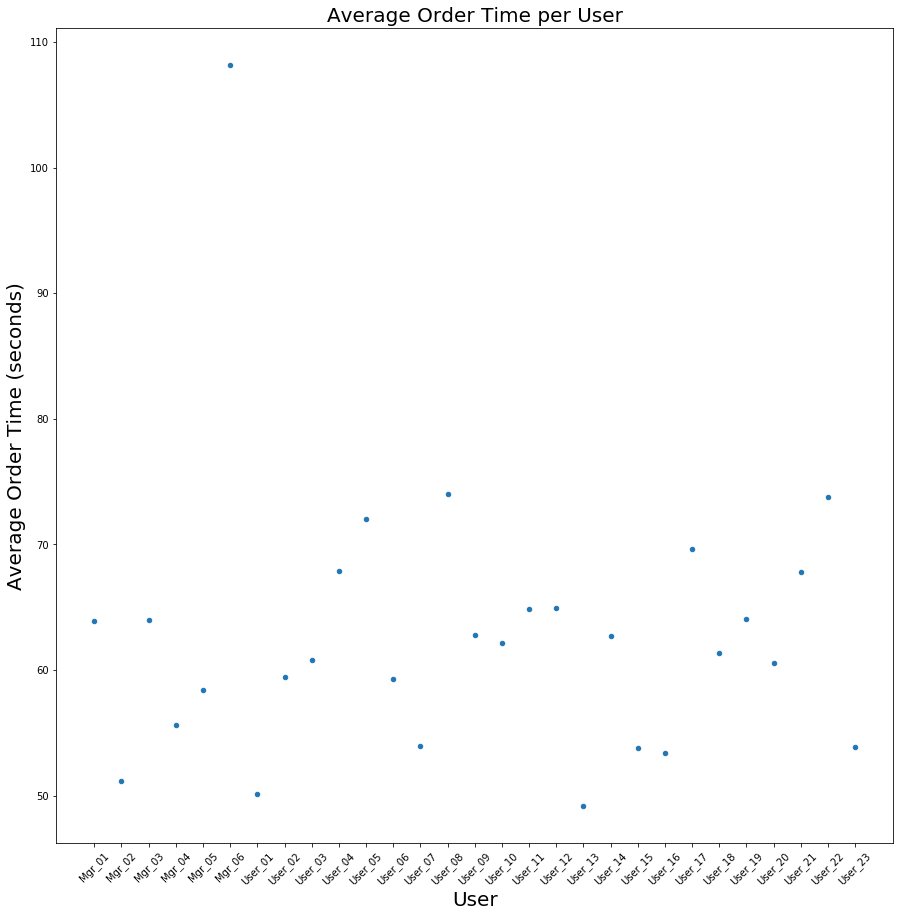

In [70]:
scat = groupbyTime.plot.scatter(x='User',y='Average Order Time',figsize=(15,15), legend=False)

#set x-axis label
plt.xlabel('User',fontsize = '20')
labels = list(groupbyTime.User)
scat.set_xticks(np.arange(len(groupbyTime.User)))
scat.set_xticklabels(groupbyTime['User'],rotation=45)

#set y-axis
plt.ylabel('Average Order Time (seconds)',fontsize = '20')

#set chart title
plt.title('Average Order Time per User',fontsize = '20')

plt.show()

In [71]:
groupbyTime[groupbyTime['User'] == 'User_13']

,User,Average Order Time
18,User_13,49.155963


### Analysis
- Based on the graph, it can easily be seen that **User_13** has the least average order time. Referring back to the dataframe, we know that **User_13** only uses an average of 49.155963 seconds to complete orders. Therefore, we can conclude **User_13** is the fastest and most efficient user. 

---

# Conclusion
## Overall business insight

Through this assignment, we now have a better understanding of how the cinema business domains operate. From the basic data exploring, it is clear that five number summary alone is enough to provide meaningful business insights. For example, we are able to look at the range of taxes and gross revenue, which helps us to confirm if the net profit is reasonable. This is useful in business because this allows us to easily gauge how much money the company is earning by looking at the statistics of net profit and relating it to gross revenue and expenses.

On the other hand, the questions provided are useful in helping a company make future decisions. For question 1, we know that Film 5 obtains the highest revenue by a large margin compared to other movies. From a business perspective, this should encourage cinema owners to license movies of similar genre to attract the same audience and gain similar amount of traction. For question 2, we know that cinemas are less popular on weekdays especially Tuesday, but have more viewers during weekends. Using this information, the cinema business owner could reallocate some workers on Tuesday to weekends (especially Saturday) to save resources and efficiently utilise them.

For question 3, we know that most people like to watch movies at cinemas at night. Conversely, there are least people from midnight to morning. The marketing team could promote movies screening from midnight to morning by introducing discounts or promotions. Question 4 is important for companies to monitor the performance of employees. By finding out the most efficient user, they could be given an employee of the month award of sorts to encourage better performance among employees.

In conclusion, the data analysis conducted has been insightful to help a company make better decisions and promote better sales. To get business insights from other aspects, it can be easily done by changing the scope of the questions and conducting analysis accordingly. 